In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm


C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
ify=pd.read_csv('INFY Historical Data.csv')
itc=pd.read_csv('ITC.csv')


In [4]:
itc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1-Jan-18,262.30,263.25,266.30,261.25,10.46M,-0.36
1,29-Dec-17,263.25,262.50,264.00,262.25,6.57M,0.53
2,28-Dec-17,261.85,263.40,264.05,261.05,15.89M,-0.11
3,27-Dec-17,262.15,264.20,264.30,261.65,6.09M,-0.76
4,26-Dec-17,264.15,263.25,265.00,262.65,9.55M,0.40


In [5]:
itc.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1983,8-Jan-10,85.02,84.64,85.69,84.64,4.88M,0.21
1984,7-Jan-10,84.84,85.19,85.69,84.10,4.99M,-0.32
1985,6-Jan-10,85.11,85.75,85.75,84.06,7.53M,0.24
1986,5-Jan-10,84.91,84.46,85.11,83.76,10.77M,0.99
1987,4-Jan-10,84.08,83.86,84.53,82.99,5.16M,1.14


In [6]:
ify.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1-Jan-18,"1,033.55","1,037.70","1,044.50","1,030.00",2.72M,-0.82
1,29-Dec-17,"1,042.05","1,030.10","1,048.80","1,030.00",3.30M,0.85
2,28-Dec-17,"1,033.25","1,030.00","1,040.00","1,023.80",4.22M,-0.10
3,27-Dec-17,"1,034.25","1,028.00","1,039.10","1,027.40",3.49M,-0.13
4,26-Dec-17,"1,035.60","1,030.00","1,041.50","1,023.00",5.40M,-0.36


In [7]:
ify.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1983,8-Jan-10,616.05,629.75,630.83,614.5,6.32M,-2.41
1984,7-Jan-10,631.26,646.65,646.65,629.55,5.45M,-2.25
1985,6-Jan-10,645.77,670.75,670.75,643.77,3.41M,-1.46
1986,5-Jan-10,655.34,655,657.67,650.02,3.45M,0.34
1987,4-Jan-10,653.15,652.5,657.5,648.83,2.03M,0.44


In [9]:
#for this demo I am removing other data that i wont use
itc.drop(['High','Low','Vol.','Change %','Price'], axis=1,inplace=True)
ify.drop(['High','Low','Vol.','Change %','Price'], axis=1,inplace=True)
# It seems start and end date matches so no need to do no trim

In [10]:
itc.index=pd.to_datetime(itc['Date'])
ify.index=pd.to_datetime(ify['Date'])

In [11]:
itc.drop('Date', axis=1,inplace=True)
ify.drop('Date', axis=1,inplace=True)

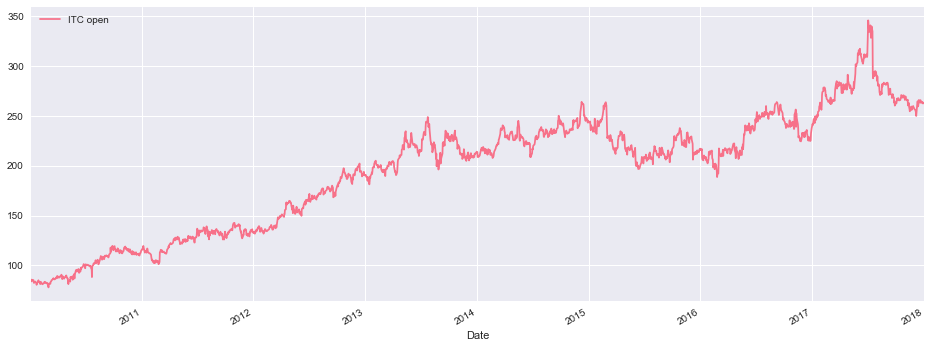

In [12]:
sns.set()
sns.set_palette("husl")
sns.set_style=('whitegrid')
itc['Open'].plot(figsize=(16,6),label='ITC open ')
plt.legend()


In [13]:
ify.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1988 entries, 2018-01-01 to 2010-01-04
Data columns (total 1 columns):
Open    1988 non-null object
dtypes: object(1)
memory usage: 23.3+ KB


In [16]:
# removing coma so 
#for i in ['Price','Open','High','Low']:
#ifs['Open']=str(ifs['Open'])
ify['Open']= ify['Open'].str.replace(',', '')
ify['Open']=pd.to_numeric(ify['Open'])
#ifs['Open']=ifs['Open'].replace(',','')
    #ifs[i]=ifs[i].apply(lambda x: x.replace(",", ""))     
    #ifs[i]=pd.to_numeric(ifs[i])


In [13]:
ify.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-01,1033.55,1037.7,1044.5,1030.0,2.72M,-0.82
2017-12-29,1042.05,1030.1,1048.8,1030.0,3.30M,0.85
2017-12-28,1033.25,1030.0,1040.0,1023.8,4.22M,-0.10
2017-12-27,1034.25,1028.0,1039.1,1027.4,3.49M,-0.13
2017-12-26,1035.60,1030.0,1041.5,1023.0,5.40M,-0.36


In [17]:
ify.describe()

,Open
count,1988.000000
mean,846.946167
std,186.212232
min,540.000000
25%,691.470000
50%,819.495000
75%,1000.105000
max,1267.000000


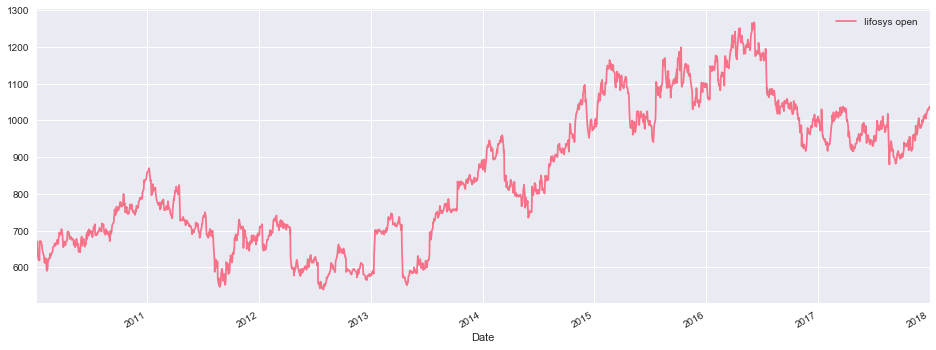

In [18]:
sns.set()
sns.set_palette("husl")
sns.set_style=('whitegrid')
ify['Open'].plot(figsize=(16,6),label='Iifosys open ')
plt.legend()

In [16]:
# comaring 2 stock at same period

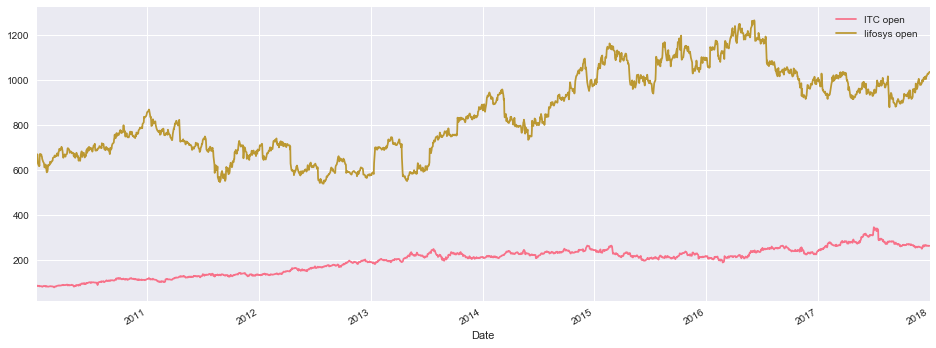

In [19]:
sns.set()
sns.set_palette("husl")
sns.set_style=('whitegrid')
itc['Open'].plot(figsize=(16,6),label='ITC open ')
ify['Open'].plot(figsize=(16,6),label='Iifosys open ')
plt.legend()

In [20]:
#Adding a new column normalizing return by dividin with first day of stock price open

for sto in (itc,ify):
    sto['Normal_Return']=sto['Open']/sto.iloc[0]['Open']

In [21]:
itc.head()

,Open,Normal_Return
Date,,
2018-01-01,263.25,1.000000
2017-12-29,262.50,0.997151
2017-12-28,263.40,1.000570
2017-12-27,264.20,1.003609
2017-12-26,263.25,1.000000


In [22]:
# using dummy investment we are investing at 60, 40 ratio. we are allocating number as 


for stock,allo in zip([itc,ify],[.6,.4]):
    stock['Allocation'] = stock['Normal_Return']*allo

In [23]:
#taking into consideration i am taking 1 lakh rs for investment i am dividing the allocation 

In [24]:
for stock in [itc,ify]:
    stock['Position Values'] = stock['Allocation']*100000

In [25]:
portfolio_val = pd.concat([ify['Position Values'],itc['Position Values']],axis=1)

In [26]:
portfolio_val.head()

,Position Values,Position Values
Date,,
2018-01-01,40000.000000,60000.000000
2017-12-29,39707.044425,59829.059829
2017-12-28,39703.189747,60034.188034
2017-12-27,39626.096174,60216.524217
2017-12-26,39703.189747,60000.000000


In [27]:
portfolio_val.columns = ['Infosys_val','Itc_val']

In [28]:
portfolio_val.head()

,Infosys_val,Itc_val
Date,,
2018-01-01,40000.000000,60000.000000
2017-12-29,39707.044425,59829.059829
2017-12-28,39703.189747,60034.188034
2017-12-27,39626.096174,60216.524217
2017-12-26,39703.189747,60000.000000


In [29]:
portfolio_val['Total_Pos'] = portfolio_val.sum(axis=1)

In [30]:
portfolio_val.head()

,Infosys_val,Itc_val,Total_Pos
Date,,,
2018-01-01,40000.000000,60000.000000,100000.000000
2017-12-29,39707.044425,59829.059829,99536.104254
2017-12-28,39703.189747,60034.188034,99737.377781
2017-12-27,39626.096174,60216.524217,99842.620391
2017-12-26,39703.189747,60000.000000,99703.189747


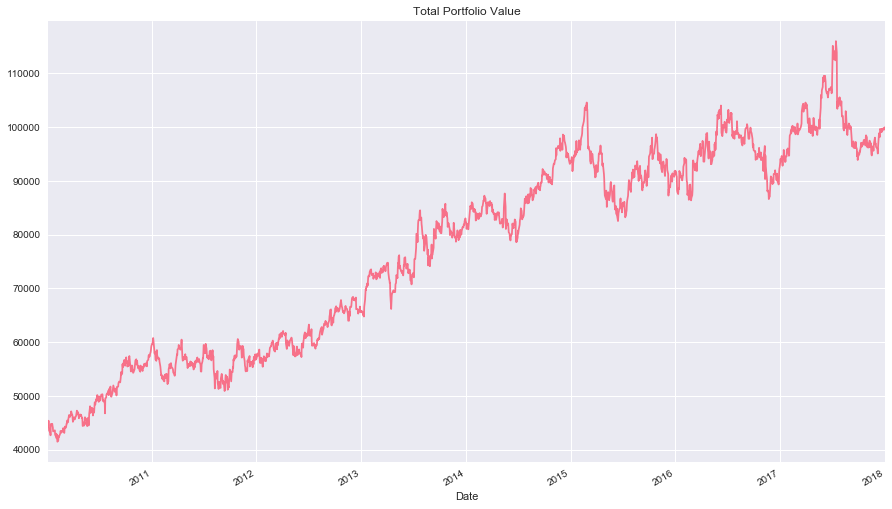

In [33]:
#visualizing the portfolio
portfolio_val['Total_Pos'].plot(figsize=(15,9))
plt.title('Total Portfolio Value')

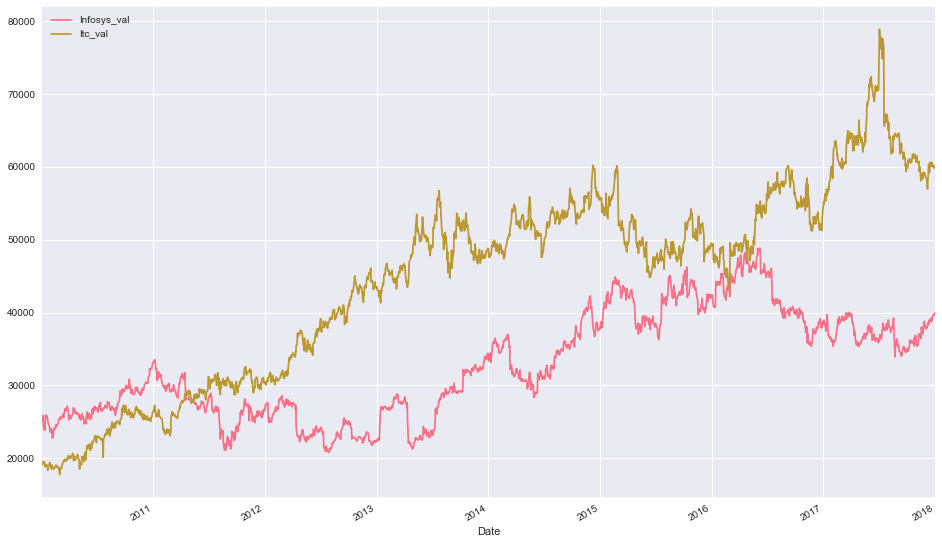

In [34]:
portfolio_val.drop('Total_Pos',axis=1).plot(figsize=(16,10),kind='line')

In [35]:
#Now i am calculating the  daily return 
portfolio_val['Daily_Return'] = portfolio_val['Total_Pos'].pct_change(1)

In [36]:
# analysing the daily return 
portfolio_val['Daily_Return'].describe()


count    1987.000000
mean       -0.000333
std         0.012441
min        -0.074218
25%        -0.007437
50%        -0.000684
75%         0.006496
max         0.088115
Name: Daily_Return, dtype: float64

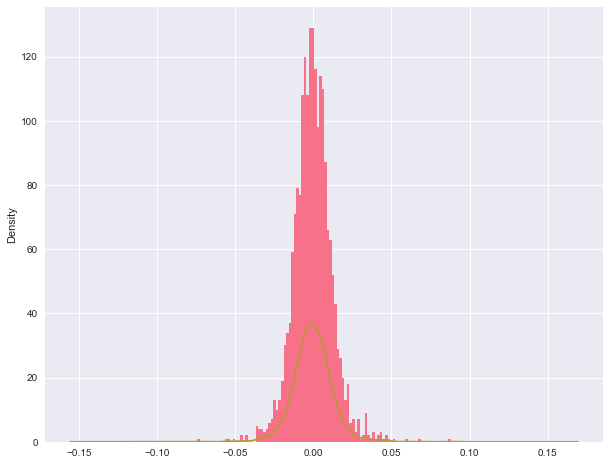

In [37]:
portfolio_val['Daily_Return'].plot(bins=100,kind='hist',figsize=(10,8))
portfolio_val['Daily_Return'].plot(kind='kde')

In [38]:
# Now I am calculating the cumilitive return. 
cum_ret = 100 * (portfolio_val['Total_Pos'][-1]/portfolio_val['Total_Pos'][0] -1 )
print('Our return {}%'.format(cum_ret))

Our return -55.73483171609798%


In [39]:
# we are at loss 

In [40]:
# Calculating the sharp ratio. It is used to measure risk
# i am taking 6 percent as risk free return
SR = (portfolio_val['Daily_Return'].mean()-.06)/portfolio_val['Daily_Return'].std()


In [41]:
ASR = (252**0.5)*SR
ASR

-76.98445525041603

In [42]:
#Now we are going to allocate our portfolio in optimum way to geet a better return

In [43]:
portfolio_val.head()

,Infosys_val,Itc_val,Total_Pos,Daily_Return
Date,,,,
2018-01-01,40000.000000,60000.000000,100000.000000,NaN
2017-12-29,39707.044425,59829.059829,99536.104254,-0.004639
2017-12-28,39703.189747,60034.188034,99737.377781,0.002022
2017-12-27,39626.096174,60216.524217,99842.620391,0.001055
2017-12-26,39703.189747,60000.000000,99703.189747,-0.001397


In [44]:
portfolio_val['Infy_DL']=portfolio_val['Infosys_val'].pct_change(1)
portfolio_val['ITC_DL']=portfolio_val['Itc_val'].pct_change(1)

In [45]:
portfolio_val.head()

,Infosys_val,Itc_val,Total_Pos,Daily_Return,Infy_DL,ITC_DL
Date,,,,,,
2018-01-01,40000.000000,60000.000000,100000.000000,NaN,NaN,NaN
2017-12-29,39707.044425,59829.059829,99536.104254,-0.004639,-0.007324,-0.002849
2017-12-28,39703.189747,60034.188034,99737.377781,0.002022,-0.000097,0.003429
2017-12-27,39626.096174,60216.524217,99842.620391,0.001055,-0.001942,0.003037
2017-12-26,39703.189747,60000.000000,99703.189747,-0.001397,0.001946,-0.003596


In [46]:

stks=pd.DataFrame()
stks['ITC_DL']=portfolio_val['ITC_DL']
stks['Infy_DL']=portfolio_val['Infy_DL']



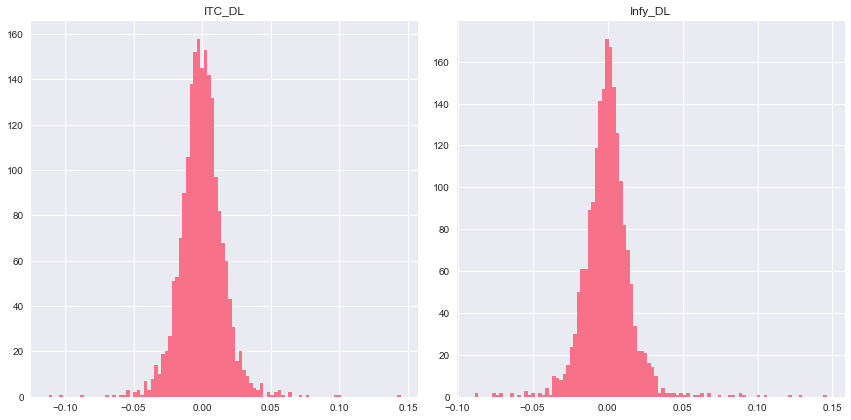

In [47]:
stks.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [48]:
stks.cov()*252

,ITC_DL,Infy_DL
ITC_DL,0.066889,0.009430
Infy_DL,0.009430,0.070247


In [49]:
stks.describe()

,ITC_DL,Infy_DL
count,1987.000000,1987.000000
mean,-0.000443,-0.000096
std,0.016292,0.016696
min,-0.111927,-0.088510
25%,-0.009240,-0.008198
50%,-0.000567,-0.000136
75%,0.008191,0.007562
max,0.144712,0.146306


In [50]:
np.random.seed(0)

# Stock Columns
print('Stocks')
print(stks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(2))
print(weights)
print('\n')



Stocks
Index(['ITC_DL', 'Infy_DL'], dtype='object')


Creating Random Weights
[ 0.5488135   0.71518937]




In [51]:
# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')



Rebalance to sum to 1.0
[ 0.43418691  0.56581309]




In [52]:

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(stks.mean() * weights) *252
print(exp_ret)
print('\n')


Expected Portfolio Return
-0.06211515146135817




In [53]:
# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(stks.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Expected Volatility
0.199329666132


Sharpe Ratio
-0.311620205195


In [60]:
# now i am doing it multiple time 
num_ports = 15000

all_weights = np.zeros((num_ports,len(stks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(2))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((stks.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(stks.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [61]:
sharpe_arr.max()

-0.091054502024963721

In [62]:
sharpe_arr.argmax()

7891

In [63]:
all_weights[1427,:]

array([ 0.13070433,  0.86929567])

In [64]:
max_sr_ret = ret_arr[7891]
max_sr_vol = vol_arr[7891]

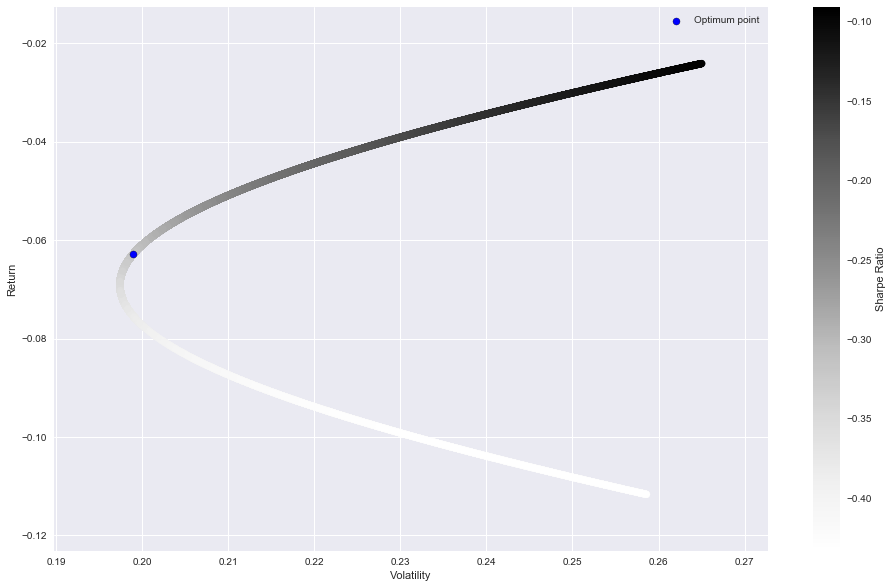

In [59]:
plt.figure(figsize=(16,10))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='blue',s=50,edgecolors='black', label ='Optimum point')
plt.legend()

In [65]:
for stock,allo in zip([itc,ify],[0.13,.87]):
    stock['Allocation_new'] = stock['Normal_Return']*allo

In [66]:
for stock in [itc,ify]:
    stock['Position Values_new'] = stock['Allocation_new']*100000

In [68]:
portfolio_val = pd.concat([ify['Position Values_new'],itc['Position Values_new']],axis=1)

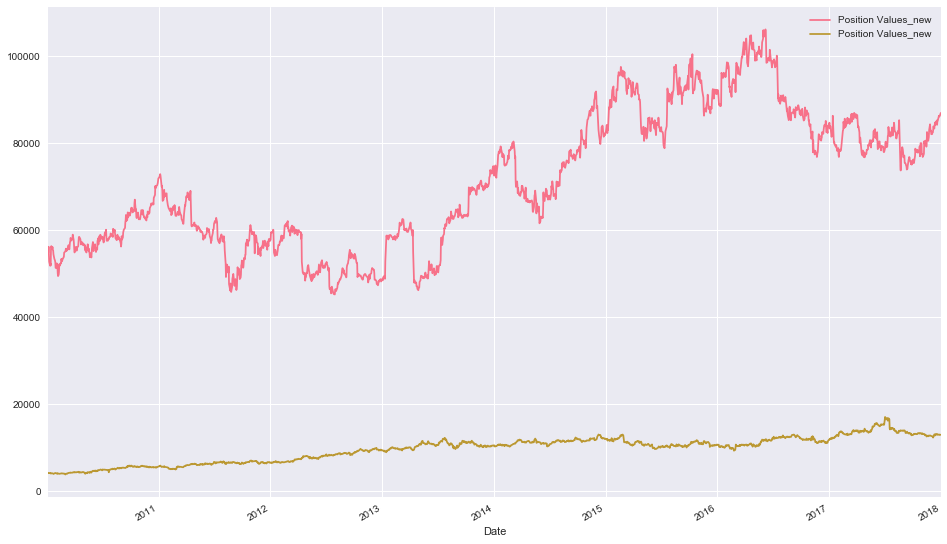

In [69]:
portfolio_val.head()
portfolio_val.plot(figsize=(16,10),kind='line')